*Modelling Biological systems*

*Celia Sánchez and Lucía Chacón*

# Modelling the time evolution of COVID-19

### 1. Plotting all models in once

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy
from scipy.integrate import odeint
import math as m

In [3]:
'The Dataset starts at 02.01.2020 and ends at 05.07.2020. We choose to convert the .csv file to .xls format and' 
'use pandas to parse it:'

data = pd.ExcelFile("COVID19_Data_Spain_ex.xls")
sheetX = data.parse(0) 
date = sheetX['Date']

#Infected and recovered people and deaths in Spain:

infected = sheetX['Infected']
deaths = sheetX['Deaths']
recovered = sheetX['Recovered']
dt = np.linspace(1,len(infected),len(infected)) # Time-vector
day_conf = 43
a = (1/2.3) #Infectivity rate
ro = (1/5.2) #Exposal rate

In [4]:
def SIR_fit(I_cond,dt,r):
    S0,I0,R0 = I_cond
    dsdt = -r*S0*I0
    didt = r*S0*I0 - (1/2.3)*I0
    drdt = (1/2.3)*I0
    return dsdt,didt,drdt
def model_SIR(t,r,S0):
    return odeint(SIR_fit,[S0,1,0],t,args = (r,))[:,1]
def SIQR(I_cond,dt,r,q):
    S0,I0,R0 = I_cond
    dsdt = -r*S0*I0
    didt = r*S0*I0 - (1/2.3)*I0-q*I0 # q = quarantine factor. After the time delay infected people will be quarantined
    drdt = (1/2.3)*I0+q*I0
    return dsdt,didt,drdt

def model_SIQR(t,q):
    return np.array(odeint(SIQR,[S_new,I_new,R_new],t,args = (r_value_SIR,q))[:,1])
# Defining the ODEs of the SEIR system:
def SEIR(y0,t,r,a,n):
    S,E,I,R = y0
    dSdt=-r*S*I
    dEdt=r*S*I-n*E
    dIdt=n*E-a*I
    dRdt=a*I
    return dSdt,dEdt,dIdt,dRdt

def model_SEIR(t,r,S0):
    return odeint(SEIR,[S0,1,1,0],t,args =(r,1/2.3,1/5.2))[:,2] 
# Defining the ODEs of the SEIQR system:
def SEIQR(y0,t,r,a,n,q):
    S,E,I,R = y0
    dSdt=-r*S*I
    dEdt=r*S*I-n*E
    dIdt=n*E-a*I-q*I
    dRdt=a*I+q*I
    return dSdt,dEdt,dIdt,dRdt

def model_SEIQR(t,q):
    return odeint(SEIQR,[S_new,E_new,I_new,R_new],t,args =(r_value_SEIR,1/2.3,1/5.2,q))[:,2]

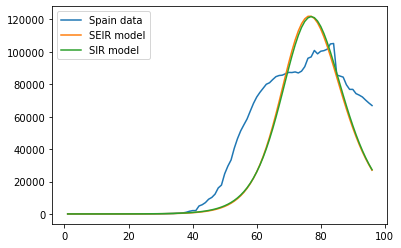

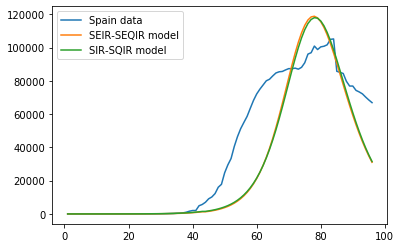

In [6]:
f_SIR = list(model_SIR(dt,2.28e-07,2671886))
f_SQIR = list(odeint(SIQR,[2666550,1526,3810],dt[day_conf:],args = (2.28e-07,0.0026))[:,1])
f_SIR_SQIR = f_SIR[0:day_conf]
f_SIR_SQIR.extend(f_SQIR)

f_SEIR = list(model_SEIR(dt,8.18e-07,1480427))
f_SEIQR = list(odeint(SEIQR,[1471912,4157,1294,3065],dt[day_conf:],args =(8.18e-07,1/2.3,1/5.2,0.006))[:,2])
f_SEIR_SEQIR = f_SEIR[0:day_conf]
f_SEIR_SEQIR.extend(f_SEIQR)

plt.figure(1)
plt.plot(dt,infected, label = 'Spain data')
plt.plot(dt,f_SEIR, label = 'SEIR model')
plt.plot(dt,f_SIR, label = 'SIR model')
plt.legend(loc='best')

plt.figure(2)
plt.plot(dt,infected, label = 'Spain data')
plt.plot(dt,f_SEIR_SEQIR,label='SEIR-SEQIR model')
plt.plot(dt,f_SIR_SQIR,label='SIR-SQIR model')
plt.legend(loc='best')
plt.show()

### Conclusions

Comparing the experimental with the SIR and SEIR predictions, it can be said that neither the SIR model nor the SEIR is a good approximation. With similar results, they did not predict the proper rate of transmissions, the peak of the infected curve, and the end of the epidemics.

Even though considering the quarantine period, what we called in this study SIR-SIQR and SEIR-SEIQR models, the prediction capacity did not get better. 

Based on these results, the experimental data cannot be modeled using any of the systems studied during this report. First of all, every model used here were simplifications of more complex systems, which their dynamics are described by a considerable amount of parameters that depict transmission events more accurately. Moreover, the lockdown factor is not considered along this study. 

To find a more realistic model, we split the dataset classifying the infected events occurring before or after the lockdown. All people who got infected before the lockdown was modeled using the SIQR.